## Final Project Submission

Please fill out:
* Student name: Andrew, Yasitha, and Kendall
* Student pace: full time
* Scheduled project review date/time: September 15, 2023 at 3:30PM EST
* Instructor name: David Elliott
* Blog post URL: TBD


# Imports and Orientation to the Data and Data Cleaning

In [38]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 
import sqlite3 
from matplotlib.ticker import PercentFormatter

In [39]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8EF7-A13E

 Directory of C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData\im.db

09/11/2023  04:40 PM    <DIR>          .
09/12/2023  08:53 AM    <DIR>          ..
09/11/2023  04:38 PM       169,443,328 im.db
               1 File(s)    169,443,328 bytes
               2 Dir(s)  29,115,072,512 bytes free


In [43]:
cd ..

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData


In [44]:
info = pd.read_csv('rt.movie_info.tsv.gz', delimiter='\t')

In [45]:
budgets = pd.read_csv(r'tn.movie_budgets.csv.gz', compression='gzip')

In [46]:
df_budget = pd.read_csv(r'tn.movie_budgets.csv.gz', compression='gzip')

In [47]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [48]:
tmdb = pd.read_csv('tmdb.movies.csv.gz')

In [49]:
gross = pd.read_csv('bom.movie_gross.csv.gz')

In [50]:
reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')

In [51]:
cd im.db

C:\Users\Jackson\Documents\flatiron\dsc-phase-2-project-v3\zippedData\im.db


In [52]:
imdbconn = sqlite3.connect('im.db')

In [53]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [54]:
info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [55]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [56]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [57]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [58]:
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('99','Documentary')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('18','Drama')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('35','Comedy')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('27','Horror')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('53','Thriller')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10402','Music')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10749','Romance')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('16','Animation')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('878','Science Fiction')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('28','Action')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10751','Family')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('80','Crime')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('36','History')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10770', 'TV Movie')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('9648', 'Mystery')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('14', 'Fantasy')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('12', 'Adventure')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('37', 'Western')
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('10752', 'War')

In [59]:
tmdb['genre_ids'].value_counts()

[Documentary]                                        3700
[]                                                   2479
[Drama]                                              2268
[Comedy]                                             1660
[Horror]                                             1145
                                                     ... 
[Horror, Crime, Documentary, History]                   1
[Crime, Drama, Action, Thriller, Science Fiction]       1
[Music, Animation, Comedy]                              1
[Animation, Family, Comedy, Fantasy]                    1
[War, Drama, Romance]                                   1
Name: genre_ids, Length: 2477, dtype: int64

In [60]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [61]:
tmdb['original_title'].value_counts()

Eden                                   7
Home                                   6
Lucky                                  5
Aftermath                              5
Legend                                 5
                                      ..
Big River                              1
The Departure                          1
Bright Eyes Austin Auditorium Shore    1
ABE                                    1
The Christmas Dragon                   1
Name: original_title, Length: 24835, dtype: int64

In [62]:
#foreign gross has null values
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [63]:
reviews['top_critic'].value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [64]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [65]:
pd.read_sql("""
SELECT *
FROM SQLITE_SCHEMA
""", imdbconn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [66]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(lambda x: int(x))

In [67]:
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(lambda x: int(x))

In [68]:
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '')
df_budget['production_budget'] = df_budget['production_budget'].apply(lambda x: int(x))

In [69]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


# Creating a Profitability Ratio and Profit Categorization

In [70]:
df_budget['profitability_ratio'] = df_budget['worldwide_gross']/df_budget['production_budget']
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000


In [71]:
df_budget['Profitability Category'] = ['Loss' if x < 2 
     else 'Low Profit' if x < 3 
     else 'Medium Profit' if x < 4 
     else 'High Profit' 
     for x in df_budget['profitability_ratio']]

In [72]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6.532577,High Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,0.427892,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,High Profit
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0.000000,Loss
5778,79,"Apr 2, 1999",Following,6000,48482,240495,40.082500,High Profit
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0.267600,Loss
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,Loss


In [73]:
movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", imdbconn)

In [74]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Merging Movie Basics and Budgets Tables

In [75]:
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
df_budget['release_month'] = df_budget['release_date'].dt.month
df_budget['release_year'] = df_budget['release_date'].dt.year

In [76]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,High Profit,12,2017
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018
5778,79,1999-04-02,Following,6000,48482,240495,40.082500,High Profit,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,0.267600,Loss,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,0.000000,Loss,9,2015


In [77]:
merged_basics_and_budgets = df_budget.merge(movie_basics, left_on='movie', right_on='primary_title', how='inner')
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,2001-07-06,Cure,10000,94596,94596,9.459600,High Profit,7,2001,tt5936960,Cure,Cure,2014,NaN,None
3811,70,1996-04-01,Bang,10000,527,527,0.052700,Loss,4,1996,tt6616538,Bang,Bang,2015,NaN,None
3812,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,Loss,1,2012,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [78]:
merged_basics_and_budgets.groupby('genres').mean().sort_values(by='profitability_ratio', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes
genres,,,,,,,,,
"Animation,Family",54.500000,3244000.0,9.246274e+07,9.246274e+07,62.138940,10.000000,1975.5,2015.50,58.000
"Drama,Family,Fantasy",44.500000,48950000.0,1.430757e+08,3.990714e+08,48.260224,2.500000,1982.5,2015.00,105.000
"Action,History,War",53.333333,47500000.0,5.913765e+07,1.435970e+08,30.851850,4.333333,2011.0,2012.00,NaN
"Action,Comedy,Drama",40.000000,14737500.0,2.948008e+07,7.451666e+07,30.045600,7.000000,2006.0,2013.25,104.125
"Horror,Romance,Thriller",91.000000,3500000.0,4.141102e+07,9.512734e+07,27.179241,4.000000,2018.0,2013.00,85.000
...,...,...,...,...,...,...,...,...,...
"Documentary,Drama,Reality-TV",22.000000,1000000.0,0.000000e+00,0.000000e+00,0.000000,4.000000,2016.0,2016.00,80.000
"Documentary,Horror",96.000000,700000.0,0.000000e+00,0.000000e+00,0.000000,3.000000,2015.0,2011.00,52.000
"Horror,Musical",87.000000,500000.0,0.000000e+00,0.000000e+00,0.000000,8.000000,2015.0,2016.00,97.000


In [79]:
merged_basics_and_budgets.groupby('genres').median().sort_values(by='profitability_ratio', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes
genres,,,,,,,,,
"Animation,Family",54.5,3244000.0,92462743.0,92462743.0,62.138940,10.0,1975.5,2015.5,58.0
"Drama,Family,Fantasy",44.5,48950000.0,143075676.5,399071384.0,48.260224,2.5,1982.5,2015.0,105.0
"Horror,Romance,Thriller",91.0,3500000.0,41411015.0,95127344.0,27.179241,4.0,2018.0,2013.0,85.0
"Crime,Fantasy,Thriller",66.0,18000000.0,119920129.0,351620129.0,19.534452,7.0,1994.0,2017.0,139.0
"Family,Fantasy,Musical",60.5,90000000.0,440035715.5,933815419.0,19.145777,7.0,2004.0,2017.5,94.5
...,...,...,...,...,...,...,...,...,...
"Documentary,Sport,Thriller",91.0,6000000.0,0.0,0.0,0.000000,2.0,2010.0,2017.0,120.0
"Adventure,Documentary,Music",30.0,29000000.0,0.0,0.0,0.000000,9.0,2019.0,2014.0,12.0
"Action,Crime,Fantasy",80.0,90000000.0,0.0,0.0,0.000000,12.0,2017.0,2017.0,117.0


In [80]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,High Profit,12,2017
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018
5778,79,1999-04-02,Following,6000,48482,240495,40.082500,High Profit,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,0.267600,Loss,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,0.000000,Loss,9,2015


In [81]:
movie_basics_and_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", imdbconn)

In [82]:
top_rated_movies = movie_basics_and_ratings.loc[(movie_basics_and_ratings['averagerating'] > 5) & (movie_basics_and_ratings['numvotes'] > 100)].sort_values(by='numvotes', ascending=False)

In [83]:
budgets_top_rated_merged = df_budget.merge(top_rated_movies, left_on='movie', right_on='primary_title', how='inner')

In [84]:
budgets_top_rated_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,Low Profit,11,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,29,2013-06-21,This Is Martin Bonner,42000,0,0,0.000000,Loss,6,2013,tt1798291,This Is Martin Bonner,This Is Martin Bonner,2013,83.0,Drama,6.6,846
1914,33,2012-03-31,Foreign Letters,40000,0,0,0.000000,Loss,3,2012,tt1492841,Foreign Letters,Foreign Letters,2012,99.0,"Comedy,Drama",6.9,180
1915,38,2016-03-18,Krisha,30000,144822,144822,4.827400,High Profit,3,2016,tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917
1916,51,2015-04-21,Ten,25000,0,0,0.000000,Loss,4,2015,tt2496400,Ten,Ten,2014,83.0,"Adventure,Horror,Mystery",5.4,623


In [85]:
budgets_top_rated_merged['primary_title'].value_counts()

Home                     15
Brothers                  6
One Day                   5
The Gambler               4
Beauty and the Beast      4
                         ..
Jack the Giant Slayer     1
Tower Heist               1
Casa de mi Padre          1
Believe                   1
Prom                      1
Name: primary_title, Length: 1693, dtype: int64

In [86]:
merged_basics_and_budgets['genres'].value_counts().head(50)

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
Drama,Romance                  89
Comedy,Drama,Romance           84
Thriller                       81
Adventure,Animation,Comedy     73
Drama,Thriller                 63
Action,Crime,Drama             63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Horror,Thriller                56
Horror,Mystery,Thriller        47
Action                         46
Action,Adventure,Fantasy       41
Crime,Drama,Thriller           39
Action,Comedy,Crime            37
Action,Adventure,Drama         34
Crime,Drama                    33
Action,Adventure,Comedy        33
Action,Thriller                32
Action,Crime,Thriller          30
Action,Drama,Thriller          28
Drama,Mystery,Thriller         28
Biography,Drama,History        27
Biography,Documentary          25
Drama,Horror,Mystery           24
Biography,Dram

In [87]:
budgets_top_rated_merged['genres'].value_counts().head(50)

Drama                         144
Comedy,Drama                   76
Adventure,Animation,Comedy     67
Comedy,Drama,Romance           66
Drama,Romance                  64
Comedy                         56
Action,Adventure,Sci-Fi        54
Action,Crime,Drama             45
Comedy,Romance                 43
Action,Adventure,Fantasy       38
Documentary                    35
Drama,Thriller                 34
Crime,Drama,Thriller           32
Action,Adventure,Drama         29
Action,Comedy,Crime            28
Biography,Drama,History        27
Horror,Thriller                26
Action,Crime,Thriller          26
Action,Adventure,Comedy        25
Horror,Mystery,Thriller        23
Biography,Drama                22
Action,Drama,Thriller          21
Biography,Comedy,Drama         21
Crime,Drama                    19
Action,Thriller                19
Crime,Drama,Mystery            19
Comedy,Crime,Drama             18
Action,Adventure,Animation     17
Drama,Mystery,Thriller         16
Drama,Horror,M

In [88]:
top_13_genres_budgets_top_rated_merged = budgets_top_rated_merged['genres'].value_counts().head(13)

In [89]:
top_13_genres_budgets_top_rated_merged.index

Index(['Drama', 'Comedy,Drama', 'Adventure,Animation,Comedy',
       'Comedy,Drama,Romance', 'Drama,Romance', 'Comedy',
       'Action,Adventure,Sci-Fi', 'Action,Crime,Drama', 'Comedy,Romance',
       'Action,Adventure,Fantasy', 'Documentary', 'Drama,Thriller',
       'Crime,Drama,Thriller'],
      dtype='object')

In [90]:
genres_over_30_counts = budgets_top_rated_merged.loc[
    (budgets_top_rated_merged['genres'] == 'Drama') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Drama') |
    (budgets_top_rated_merged['genres'] == 'Adventure,Animation,Comedy') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Drama,Romance') |
    (budgets_top_rated_merged['genres'] == 'Drama,Romance') |
    (budgets_top_rated_merged['genres'] == 'Comedy') |
    (budgets_top_rated_merged['genres'] == 'Action,Adventure,Sci-Fi') |
    (budgets_top_rated_merged['genres'] == 'Action,Crime,Drama') |
    (budgets_top_rated_merged['genres'] == 'Comedy,Romance') |
    (budgets_top_rated_merged['genres'] == 'Action,Adventure,Fantasy') |
    (budgets_top_rated_merged['genres'] == 'Documentary') |
    (budgets_top_rated_merged['genres'] == 'Drama,Thriller') |
    (budgets_top_rated_merged['genres'] == 'Crime,Drama,Thriller') ]

In [91]:
genres_over_30_means = genres_over_30_counts.groupby('genres').mean().sort_values(by='profitability_ratio', ascending=False)
genres_over_30_means

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes,averagerating,numvotes
genres,,,,,,,,,,,
"Adventure,Animation,Comedy",46.179104,1.024478e+08,1.397098e+08,3.979187e+08,5.165292,6.940299,2014.119403,2014.447761,94.238806,6.591045,120482.388060
"Drama,Romance",50.921875,2.010531e+07,2.387895e+07,5.294523e+07,4.738658,6.562500,2009.296875,2013.250000,109.253968,6.750000,56135.328125
Drama,52.680556,1.752133e+07,2.054540e+07,3.801842e+07,4.342260,7.395833,2008.437500,2013.604167,106.845070,6.672222,23176.277778
"Comedy,Romance",57.395349,2.362326e+07,4.211842e+07,7.935273e+07,3.826229,5.837209,2011.372093,2013.093023,106.190476,6.065116,64153.093023
"Action,Adventure,Sci-Fi",48.222222,1.701778e+08,2.352011e+08,6.416408e+08,3.826100,5.759259,2013.962963,2014.500000,129.703704,6.846296,429141.000000
"Comedy,Drama",51.171053,1.788867e+07,2.589718e+07,4.349541e+07,3.072961,7.065789,2011.052632,2013.671053,106.907895,6.567105,43319.105263
"Comedy,Drama,Romance",51.484848,1.202689e+07,1.853675e+07,3.161274e+07,2.902636,7.242424,2011.424242,2012.848485,100.878788,6.534848,68232.439394
Comedy,45.714286,2.703574e+07,3.923974e+07,6.734748e+07,2.774303,6.607143,2011.982143,2013.375000,99.410714,5.964286,62858.053571
"Action,Adventure,Fantasy",54.157895,1.342263e+08,1.177601e+08,3.642553e+08,2.619827,5.815789,2012.210526,2014.973684,115.789474,6.157895,219663.052632


In [92]:
genres_over_30_means.index

Index(['Adventure,Animation,Comedy', 'Drama,Romance', 'Drama',
       'Comedy,Romance', 'Action,Adventure,Sci-Fi', 'Comedy,Drama',
       'Comedy,Drama,Romance', 'Comedy', 'Action,Adventure,Fantasy',
       'Action,Crime,Drama', 'Drama,Thriller', 'Crime,Drama,Thriller',
       'Documentary'],
      dtype='object', name='genres')

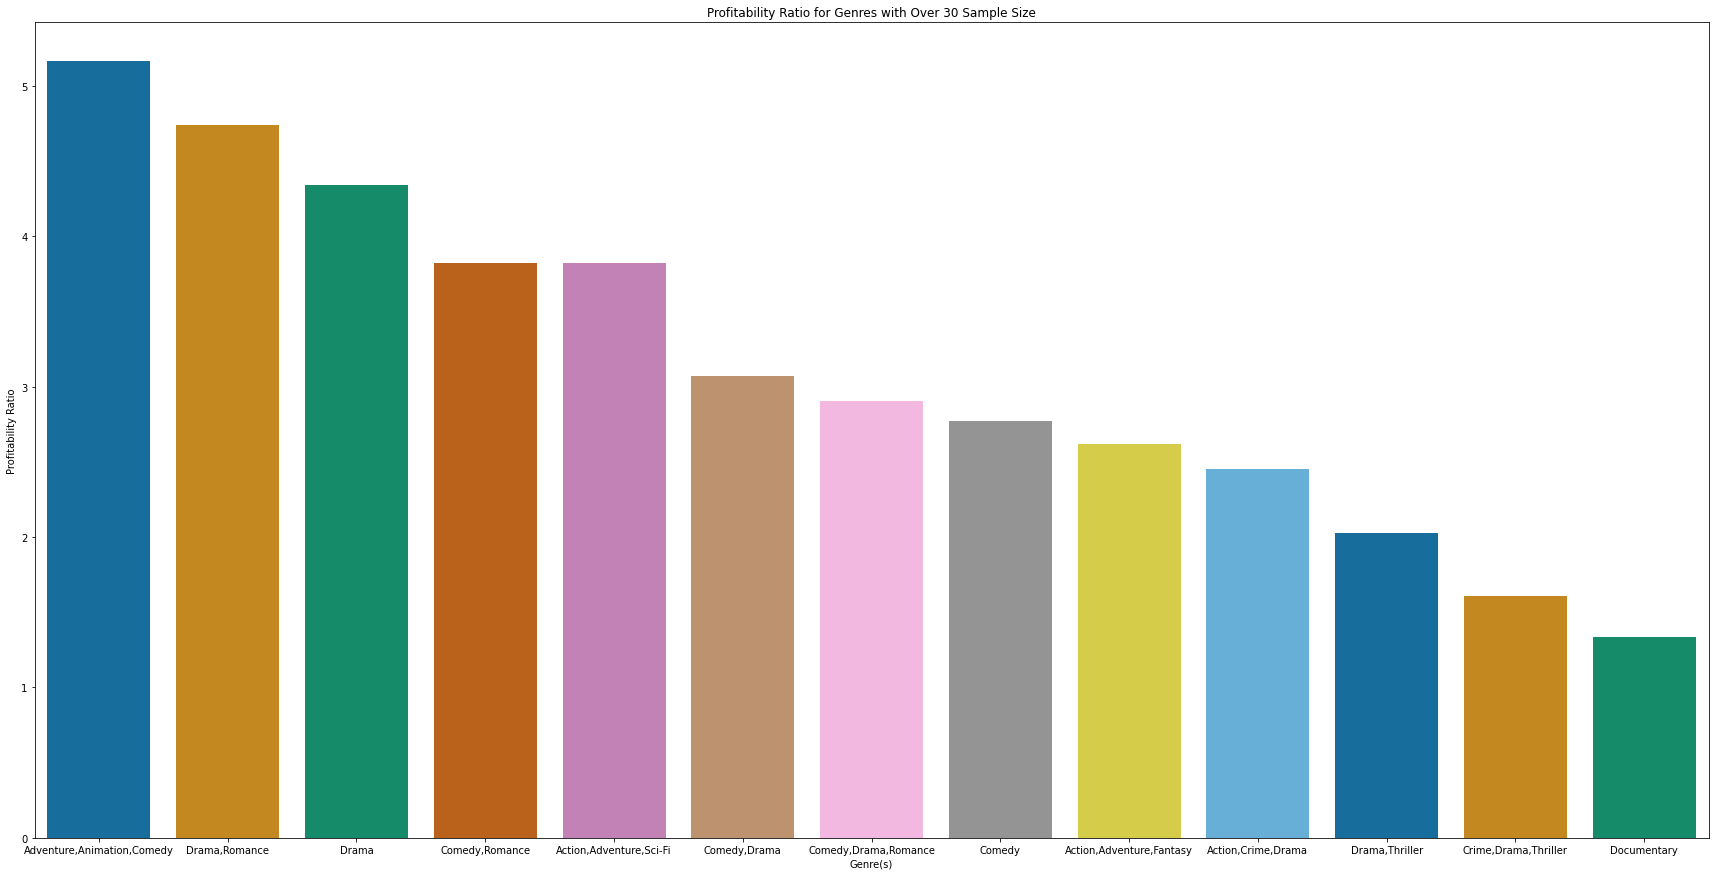

In [93]:
fig, ax = plt.subplots(figsize=(30,15))

sns.barplot(x=genres_over_30_means.index, y=genres_over_30_means['profitability_ratio'], palette="colorblind")

ax.set_title('Profitability Ratio for Genres with Over 30 Sample Size')
ax.set_xlabel('Genre(s)')
ax.set_ylabel('Profitability Ratio');

In [94]:
budgets_top_rated_merged.groupby('genres').mean().sort_values(by='profitability_ratio', ascending=False)

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes,averagerating,numvotes
genres,,,,,,,,,,,
"Biography,Documentary",34.333333,8.636000e+06,3.426567e+07,8.933333e+07,104.118104,10.666667,1991.666667,2012.666667,81.333333,7.200000,329.666667
"Drama,Family,Fantasy",44.500000,4.895000e+07,1.430757e+08,3.990714e+08,48.260224,2.500000,1982.500000,2015.000000,105.000000,6.900000,142792.000000
"Crime,Drama,Family",52.000000,3.275000e+07,1.039735e+08,2.088380e+08,34.529686,7.000000,1988.000000,2016.500000,96.500000,6.300000,1766.500000
"Documentary,Sport",41.500000,5.000000e+05,1.584683e+07,1.593700e+07,31.874004,10.000000,1993.000000,2012.000000,84.000000,7.900000,1716.500000
Horror,53.083333,1.388033e+07,2.632934e+07,5.480404e+07,28.992425,7.333333,2006.916667,2013.916667,90.750000,5.591667,52214.666667
...,...,...,...,...,...,...,...,...,...,...,...
"Documentary,Sport,Thriller",91.000000,6.000000e+06,0.000000e+00,0.000000e+00,0.000000,2.000000,2010.000000,2017.000000,120.000000,7.900000,28979.000000
Adventure,48.000000,8.000000e+06,0.000000e+00,0.000000e+00,0.000000,6.000000,2019.000000,2016.000000,102.000000,7.900000,240.000000
"Comedy,Horror,Thriller",39.000000,2.000000e+05,0.000000e+00,0.000000e+00,0.000000,8.000000,2014.000000,2012.000000,82.000000,5.400000,150.000000


In [95]:
budgets_top_rated_merged.groupby('averagerating').mean().sort_values(by='profitability_ratio', ascending=False).head(20)

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes,numvotes
averagerating,,,,,,,,,,
8.5,34.500000,5.696667e+07,1.215408e+08,4.162094e+08,12.168084,9.333333,2011.666667,2014.500000,142.666667,2.404142e+05
8.0,64.700000,5.685500e+07,1.195152e+08,3.423400e+08,8.776439,7.700000,2014.300000,2014.600000,122.157895,3.529020e+05
7.0,54.205128,4.827975e+07,7.362789e+07,1.748455e+08,8.337034,7.230769,2010.653846,2013.769231,109.935897,1.375936e+05
5.3,54.760000,3.009198e+07,2.194224e+07,5.118770e+07,7.313725,6.580000,2011.260000,2014.480000,101.795918,2.839242e+04
8.3,53.200000,5.236000e+07,1.060480e+08,3.356509e+08,6.877507,8.000000,2013.000000,2013.000000,128.000000,2.284612e+05
7.4,53.018868,3.362830e+07,6.253707e+07,1.452877e+08,6.259237,8.056604,2010.905660,2014.509434,115.245283,1.340911e+05
7.5,52.261905,5.165298e+07,8.547475e+07,2.116481e+08,6.227058,7.166667,2013.023810,2014.071429,115.928571,1.603257e+05
8.2,72.285714,4.764286e+07,9.475588e+07,2.246567e+08,5.903885,9.571429,2010.428571,2013.857143,123.571429,3.810527e+05
7.7,53.250000,4.616875e+07,8.989203e+07,1.981354e+08,5.550714,7.062500,2011.406250,2013.656250,110.967742,2.522295e+05


In [96]:
budgets_top_rated_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,Low Profit,11,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,29,2013-06-21,This Is Martin Bonner,42000,0,0,0.000000,Loss,6,2013,tt1798291,This Is Martin Bonner,This Is Martin Bonner,2013,83.0,Drama,6.6,846
1914,33,2012-03-31,Foreign Letters,40000,0,0,0.000000,Loss,3,2012,tt1492841,Foreign Letters,Foreign Letters,2012,99.0,"Comedy,Drama",6.9,180
1915,38,2016-03-18,Krisha,30000,144822,144822,4.827400,High Profit,3,2016,tt4266638,Krisha,Krisha,2015,83.0,Drama,7.2,5917
1916,51,2015-04-21,Ten,25000,0,0,0.000000,Loss,4,2015,tt2496400,Ten,Ten,2014,83.0,"Adventure,Horror,Mystery",5.4,623


In [97]:
budgets_top_rated_merged.groupby('release_month').mean().sort_values(by='profitability_ratio', ascending=False).head(20)

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_year,start_year,runtime_minutes,averagerating,numvotes
release_month,,,,,,,,,,
10,51.753927,2.444942e+07,2.699127e+07,6.762832e+07,6.378915,2010.575916,2013.638743,107.863874,6.536126,87019.324607
4,49.205882,3.091682e+07,3.781506e+07,9.824151e+07,5.767352,2011.988235,2013.670588,106.541176,6.457647,72078.305882
8,52.670807,2.973480e+07,3.823723e+07,8.019569e+07,4.996842,2010.677019,2013.627329,104.428571,6.424224,81686.981366
2,53.633588,3.541839e+07,4.643399e+07,9.898166e+07,4.785940,2010.526718,2014.183206,105.369231,6.347328,85028.038168
11,45.871345,5.028604e+07,6.731988e+07,1.737318e+08,4.336084,2011.228070,2013.988304,112.335294,6.750292,133543.239766
7,52.919463,4.828923e+07,6.321852e+07,1.657621e+08,4.100144,2010.630872,2013.691275,107.751678,6.493289,122535.879195
1,55.899160,2.818083e+07,3.122838e+07,6.986305e+07,4.065718,2011.394958,2013.831933,107.571429,6.342857,58179.000000
6,50.750000,5.452983e+07,7.477582e+07,1.861415e+08,3.419034,2010.923077,2013.820513,107.576923,6.555128,116373.070513
3,50.011834,4.946767e+07,6.154996e+07,1.472018e+08,2.839157,2013.343195,2013.946746,105.922619,6.426036,97323.733728


In [98]:
merged_basics_and_budgets_genres = merged_basics_and_budgets[merged_basics_and_budgets['genres'].map(merged_basics_and_budgets['genres'].value_counts()) >= 30]

In [99]:
merged_basics_and_budgets_genres

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,52,2015-12-01,Dutch Kills,25000,0,0,0.000000,Loss,12,2015,tt2759066,Dutch Kills,Dutch Kills,2015,90.0,"Crime,Drama,Thriller"
3803,54,2014-12-31,Dry Spell,22000,0,0,0.000000,Loss,12,2014,tt2375036,Dry Spell,Dry Spell,2013,90.0,"Comedy,Romance"
3807,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,Loss,12,2014,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama
3809,68,2001-07-06,Cure,10000,94596,94596,9.459600,High Profit,7,2001,tt1872026,Cure,Cure,2011,93.0,Drama


In [100]:
merged_basics_and_budgets_genres_medians = merged_basics_and_budgets_genres.groupby('genres').median().sort_values(by='profitability_ratio', ascending=False).head(10)
merged_basics_and_budgets_genres_medians

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year,start_year,runtime_minutes
genres,,,,,,,,,
"Horror,Mystery,Thriller",60.0,10000000.0,30564825.0,54104225.0,5.410423,8.0,2014.0,2015.0,89.0
"Action,Adventure,Comedy",46.0,90000000.0,76423035.0,245328374.0,3.611787,6.0,2015.0,2016.0,107.0
"Action,Adventure,Sci-Fi",41.5,170000000.0,154539421.5,466288586.5,3.243793,5.5,2014.0,2014.0,127.5
"Adventure,Animation,Comedy",46.0,80000000.0,100246011.0,274392649.0,2.800777,7.0,2014.0,2015.0,93.0
"Action,Adventure,Fantasy",51.0,110000000.0,61737191.0,250700000.0,2.278165,5.0,2015.0,2016.0,113.5
"Comedy,Romance",57.0,18000000.0,25317379.0,36882378.0,2.166812,6.0,2012.0,2013.0,102.5
"Comedy,Drama,Romance",54.5,8000000.0,7846612.0,13410297.5,1.953925,7.5,2012.0,2012.5,98.0
"Action,Comedy,Crime",56.0,37000000.0,37915414.0,63129909.0,1.769682,5.0,2013.0,2014.0,104.0
"Drama,Romance",43.0,10100000.0,11368012.0,19535005.0,1.735909,6.0,2012.0,2013.0,105.0


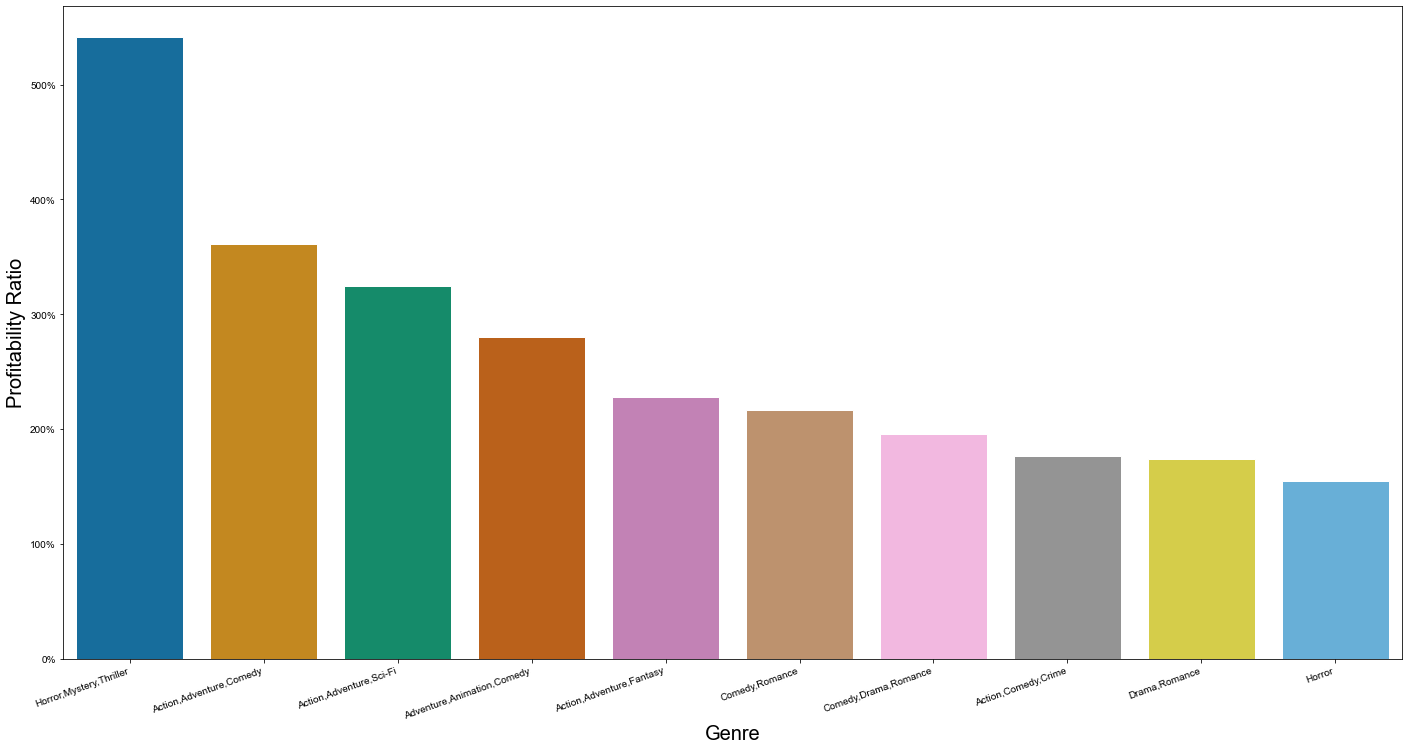

In [101]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=merged_basics_and_budgets_genres_medians.index, y=merged_basics_and_budgets_genres_medians['profitability_ratio'], palette='colorblind')

ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Profitability Ratio', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

In [102]:
merged_basics_and_budgets_genres['genres'].value_counts()

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
Drama,Romance                  89
Comedy,Drama,Romance           84
Thriller                       81
Adventure,Animation,Comedy     73
Drama,Thriller                 63
Action,Crime,Drama             63
Comedy,Romance                 59
Action,Adventure,Sci-Fi        58
Horror,Thriller                56
Horror,Mystery,Thriller        47
Action                         46
Action,Adventure,Fantasy       41
Crime,Drama,Thriller           39
Action,Comedy,Crime            37
Action,Adventure,Drama         34
Action,Adventure,Comedy        33
Crime,Drama                    33
Action,Thriller                32
Action,Crime,Thriller          30
Name: genres, dtype: int64

In [103]:
contingency_table=pd.crosstab(index=merged_basics_and_budgets["genres"],columns=merged_basics_and_budgets['Profitability Category'])

In [104]:
contingency_table

Profitability Category,High Profit,Loss,Low Profit,Medium Profit
genres,,,,
Action,9,32,4,1
"Action,Adventure",1,3,1,1
"Action,Adventure,Animation",8,4,3,2
"Action,Adventure,Biography",0,3,0,2
"Action,Adventure,Comedy",11,13,2,7
...,...,...,...,...
"Sci-Fi,Thriller",2,4,2,0
Sport,0,3,0,0
Thriller,14,55,5,7


In [105]:
stats.contingency.chi2_contingency(contingency_table)

(1223.438980578918,
 3.2659487457962856e-05,
 1032,
 array([[ 9.78252738, 27.01255677,  5.62864013,  3.57627571],
        [ 1.27598183,  3.52337697,  0.73417045,  0.46647075],
        [ 3.61528186,  9.98290142,  2.08014961,  1.32166711],
        ...,
        [17.22575474, 47.5655891 ,  9.9113011 ,  6.29735506],
        [ 0.85065456,  2.34891798,  0.48944697,  0.3109805 ],
        [ 1.70130911,  4.69783596,  0.97889394,  0.62196099]]))

In [106]:
df_runtime = pd.read_sql("""

SELECT *
FROM movie_basics 

""", imdbconn)

In [107]:
df_runtime

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [108]:
df_runtime.loc[df_runtime['runtime_minutes'] < 2]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
2570,tt10265824,Lamentation For Little Girls Who Are In Love W...,Lamentation For Little Girls Who Are In Love W...,2019,1.0,Animation
3298,tt10326116,Happy New Year,Happy New Year,2019,1.0,Animation
22903,tt1935926,Tierra,Tierra,2010,1.0,"Documentary,Family"
54307,tt3194766,Guerreiros da paz e poesia: It All Depends on Us,Guerreiros da paz e poesia: It All Depends on Us,2013,1.0,"Documentary,Music"
57140,tt3331660,Shark Sanctuary,Shark Sanctuary,2012,1.0,"Adventure,Documentary"
60809,tt3515578,November,November,2014,1.0,"Documentary,History"
72190,tt4122866,Powered By Green Smoothies,Powered By Green Smoothies,2014,1.0,"Adventure,Documentary,Sport"
93214,tt5430316,Great Valley Nature Center Documentary,Great Valley Nature Center Documentary,2015,1.0,Documentary
95787,tt5589268,A Serendipitous Exploration,A Serendipitous Exploration,2016,1.0,Documentary
98755,tt5773518,Isa One Minute Portrait,Isa One Minute Portrait,2016,1.0,Documentary


In [109]:
df_runtime['Runtime_cat'] = ['Extremly short Movie' if x < 20 else 'Short Movie' if x < 90 else 'Average Movie' if x < 120 else 'Long Movie' for x in df_runtime['runtime_minutes'] ]

In [110]:
movie_basics['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [111]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,High Profit,12,2017
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018
5778,79,1999-04-02,Following,6000,48482,240495,40.082500,High Profit,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,0.267600,Loss,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,0.000000,Loss,9,2015


In [112]:
contingency_table=pd.crosstab(index=df_budget['release_month'],columns=df_budget['Profitability Category'])
contingency_table.sort_values(by='High Profit', ascending=False)

Profitability Category,High Profit,Loss,Low Profit,Medium Profit
release_month,,,,
12,162,428,93,62
11,140,230,70,46
6,135,220,79,45
7,123,200,55,62
10,117,347,68,41
5,112,200,59,36
8,106,280,69,41
3,100,264,66,40
2,97,214,47,34


In [113]:
df_budget['release_month'].value_counts()

12    745
10    573
8     496
9     493
11    486
6     479
3     470
4     454
7     440
5     407
2     392
1     347
Name: release_month, dtype: int64

In [114]:
budgets_groupedby_month_medians = df_budget.groupby(df_budget['release_month']).median().sort_values(by='profitability_ratio', ascending=False)
budgets_groupedby_month_medians

,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_year
release_month,,,,,,
6,49.0,21000000.0,33644788.0,46844357.0,2.252110,2006.0
7,50.0,21000000.0,31803006.5,51134699.5,2.244067,2006.0
11,50.0,24000000.0,30903239.0,50530475.5,2.168355,2006.0
5,51.0,16000000.0,19894664.0,29934477.0,2.075749,2006.0
2,48.5,17250000.0,19096003.0,33097834.5,1.740280,2008.0
8,51.0,16000000.0,16142205.0,24202936.5,1.682874,2006.0
12,53.0,19400000.0,16235738.0,31166312.0,1.628805,2007.0
3,51.0,15000000.0,15303247.5,25599836.0,1.531329,2007.0
1,48.0,14000000.0,14218868.0,20169934.0,1.512054,2008.0


In [115]:
budgets_groupedby_month_medians.index

Int64Index([6, 7, 11, 5, 2, 8, 12, 3, 1, 10, 4, 9], dtype='int64', name='release_month')

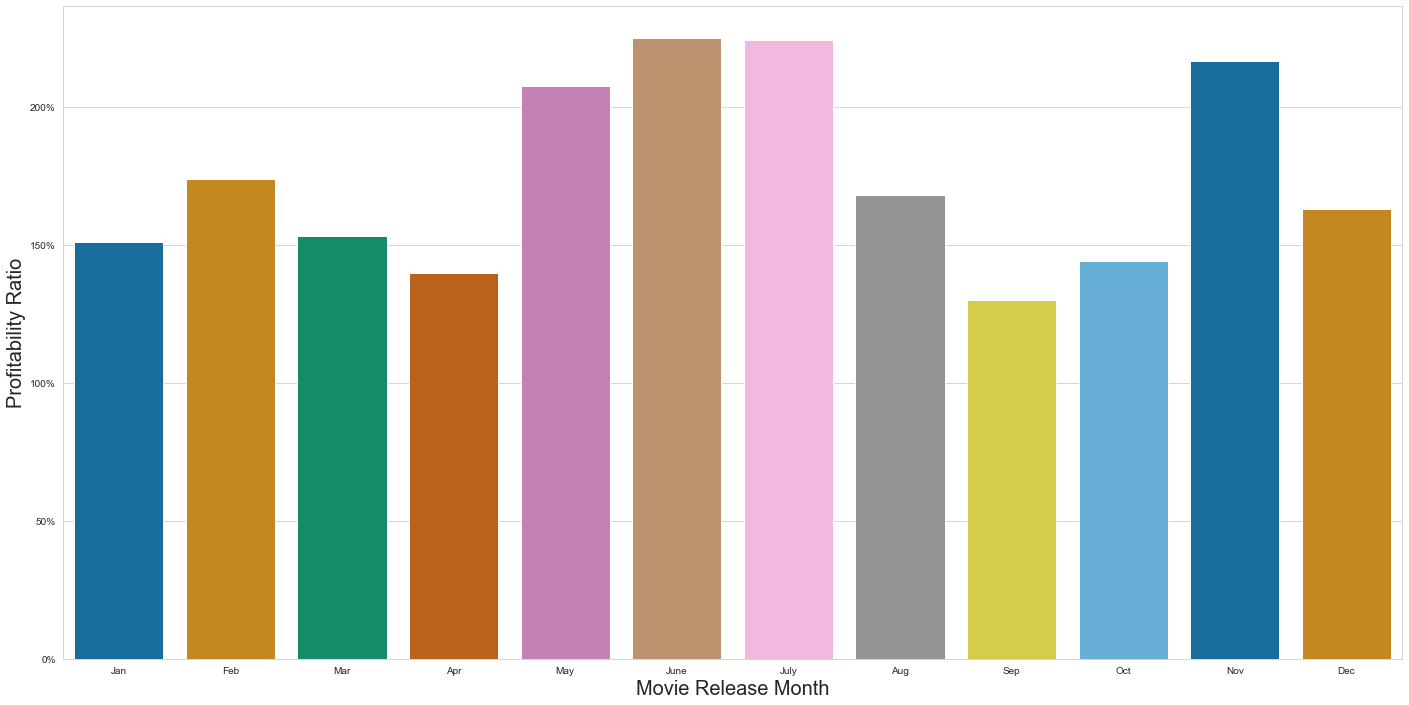

In [116]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=budgets_groupedby_month_medians.index, y=budgets_groupedby_month_medians['profitability_ratio'], palette="colorblind")

ax.set_xlabel('Movie Release Month', fontsize=20)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
ax.set_ylabel('Profitability Ratio', fontsize=20)
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

In [117]:
stats.contingency.chi2_contingency(contingency_table)

(98.85367547690046,
 1.7119696415638977e-08,
 33,
 array([[ 80.83863715, 189.70373573,  45.91058457,  30.54704255],
        [ 91.3220339 , 214.30508475,  51.86440678,  34.50847458],
        [109.49325493, 256.94742304,  62.18436527,  41.37495676],
        [105.76582497, 248.20027672,  60.06745071,  39.9664476 ],
        [ 94.81649948, 222.50553442,  53.84901418,  35.82895192],
        [111.58993428, 261.86769284,  63.37512971,  42.16724317],
        [102.50432376, 240.54652369,  58.21515047,  38.73400208],
        [115.55032861, 271.1615358 ,  65.62435144,  43.66378416],
        [114.85143549, 269.52144587,  65.22742996,  43.39968869],
        [133.48858526, 313.25717745,  75.81200277,  50.44223452],
        [113.22068488, 265.69456935,  64.30127983,  42.78346593],
        [173.55845728, 407.28900035,  98.56883431,  65.58370806]]))

In [118]:
contingency_table=pd.crosstab(index=df_budget['release_year'],columns=df_budget['Profitability Category'])
contingency_table.sort_values(by='High Profit', ascending=False).head(20)

Profitability Category,High Profit,Loss,Low Profit,Medium Profit
release_year,,,,
2012,58,125,33,19
2015,57,234,30,17
2006,56,151,34,19
2016,54,108,35,22
2017,52,74,24,18
2013,51,121,40,26
2018,50,63,20,10
2014,50,147,33,25
2011,49,140,49,16


In [119]:
stats.contingency.chi2_contingency(contingency_table)

(573.8951083678264,
 1.2517065617699593e-21,
 285,
 array([[2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [4.65928744e-01, 1.09339329e+00, 2.64614320e-01, 1.76063646e-01],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [4.65928744e-01, 1.09339329e+00, 2.64614320e-01, 1.76063646e-01],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [6.98893117e-01, 1.64008993e+00, 3.96921480e-01, 2.64095469e-01],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80318229e-02],
        [6.98893117e-01, 1.64008993e+00, 3.96921480e-01, 2.64095469e-01],
        [2.32964372e-01, 5.46696645e-01, 1.32307160e-01, 8.80

In [120]:
merged_budgets_and_movie_basic = movie_basics.merge(df_budget, left_on='primary_title', right_on='movie', how='inner')

In [121]:
merged_budgets_and_movie_basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,Foodfight!,45000000,0,73706,0.001638,Loss,12,2012
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,1995-08-18,Mortal Kombat,20000000,70433227,122133227,6.106661,High Profit,8,1995
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,2015-06-19,The Overnight,200000,1109808,1165996,5.829980,High Profit,6,2015
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,2015-06-19,The Overnight,200000,1109808,1165996,5.829980,High Profit,6,2015
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,2013-03-22,On the Road,25000000,720828,9313302,0.372532,Loss,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,2008-11-14,Fuel,2500000,174255,174255,0.069702,Loss,11,2008
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,1982-04-02,Diner,5000000,12592907,12592907,2.518581,Low Profit,4,1982
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,2008-08-27,Traitor,22000000,23530831,27882226,1.267374,Loss,8,2008
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,2004-10-29,Ray,40000000,75305995,124823094,3.120577,Medium Profit,10,2004


In [122]:
horror_mystery_thriller = merged_budgets_and_movie_basic.loc[merged_budgets_and_movie_basic['genres'] == 'Horror,Mystery,Thriller']

In [123]:
horror_mystery_thriller

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
22,tt0431021,The Possession,The Possession,2012,92.0,"Horror,Mystery,Thriller",81,2012-08-31,The Possession,14000000,49130588,82925064,5.923219,High Profit,8,2012
136,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"Horror,Mystery,Thriller",61,2019-04-05,Pet Sematary,21000000,54724696,109501146,5.214340,High Profit,4,2019
137,tt0837563,Pet Sematary,Pet Sematary,2019,101.0,"Horror,Mystery,Thriller",61,1989-04-21,Pet Sematary,11500000,57469179,57469179,4.997320,High Profit,4,1989
148,tt0872230,My Soul to Take,My Soul to Take,2010,107.0,"Horror,Mystery,Thriller",68,2010-10-08,My Soul to Take,25000000,14744435,16727470,0.669099,Loss,10,2010
365,tt3149900,The Hunted,The Hunted,2013,89.0,"Horror,Mystery,Thriller",28,2003-03-14,The Hunted,55000000,34234008,47213095,0.858420,Loss,3,2003
642,tt1204977,Ouija,Ouija,2014,89.0,"Horror,Mystery,Thriller",60,2014-10-24,Ouija,5000000,50856010,103300632,20.660126,High Profit,10,2014
800,tt1314655,Devil,Devil,2010,80.0,"Horror,Mystery,Thriller",71,2010-09-17,Devil,10000000,33679655,63354114,6.335411,High Profit,9,2010
964,tt4025788,Paranoia,Paranoia,2014,85.0,"Horror,Mystery,Thriller",19,2013-08-16,Paranoia,40000000,7388654,16340767,0.408519,Loss,8,2013
1060,tt1457767,The Conjuring,The Conjuring,2013,112.0,"Horror,Mystery,Thriller",93,2013-07-19,The Conjuring,20000000,137400141,318000141,15.900007,High Profit,7,2013
1123,tt3387542,The Forest,The Forest,2016,93.0,"Horror,Mystery,Thriller",92,2016-01-08,The Forest,10000000,26594261,40749230,4.074923,High Profit,1,2016


In [124]:
merged_budgets_and_movie_basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_id                3815 non-null   object        
 1   primary_title           3815 non-null   object        
 2   original_title          3814 non-null   object        
 3   start_year              3815 non-null   int64         
 4   runtime_minutes         3328 non-null   float64       
 5   genres                  3743 non-null   object        
 6   id                      3815 non-null   int64         
 7   release_date            3815 non-null   datetime64[ns]
 8   movie                   3815 non-null   object        
 9   production_budget       3815 non-null   int64         
 10  domestic_gross          3815 non-null   int64         
 11  worldwide_gross         3815 non-null   int64         
 12  profitability_ratio     3815 non-null   float64 

In [125]:
june_and_july = merged_budgets_and_movie_basic.loc[(merged_budgets_and_movie_basic['release_month'] == 6) | (merged_budgets_and_movie_basic['release_month'] == 7)]

In [126]:
JJ_groupby_median = june_and_july.groupby('genres').median().sort_values(by='profitability_ratio', ascending=False)
JJ_groupby_median

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year
genres,,,,,,,,,
"Drama,Fantasy,Mystery",2010.0,115.0,5.0,22000000.0,217631306.0,517600000.0,23.527273,7.0,1990.0
"Crime,Fantasy,Thriller",2017.0,139.0,66.0,18000000.0,119920129.0,351620129.0,19.534452,7.0,1994.0
"Biography,Drama,Romance",2013.0,85.0,38.0,900000.0,16098998.0,17549645.0,19.499606,7.0,2013.0
"Drama,War",2014.0,78.5,77.5,18500000.0,58200893.5,138912511.5,13.490893,6.0,1988.5
"Comedy,Documentary",2013.0,75.0,14.0,2500000.0,32244051.0,32327255.0,12.930902,7.0,2013.0
...,...,...,...,...,...,...,...,...,...
"Crime,Thriller",2011.0,80.0,16.0,17000000.0,0.0,0.0,0.000000,7.0,2019.0
"Fantasy,Musical",2010.0,99.0,60.0,3000000.0,0.0,0.0,0.000000,7.0,1951.0
"Drama,Mystery,War",2013.0,116.0,86.0,500000.0,0.0,0.0,0.000000,6.0,2015.0


In [127]:
june_and_july['genres'].value_counts().head(30)

Drama                         70
Documentary                   43
Comedy                        28
Adventure,Animation,Comedy    22
Action,Adventure,Sci-Fi       18
Comedy,Drama                  13
Comedy,Drama,Romance          12
Drama,Romance                 12
Action,Adventure,Comedy       11
Comedy,Romance                10
Action,Comedy,Crime            8
Action,Crime,Drama             8
Action,Thriller                7
Action,Adventure,Fantasy       7
Crime,Drama,Thriller           7
Thriller                       7
Drama,Mystery,Thriller         7
Horror,Thriller                6
Horror                         6
Action                         6
Action,Adventure,Drama         6
Biography,Documentary          5
Action,Comedy                  5
Documentary,History            5
Drama,Thriller                 4
Action,Drama                   4
Sci-Fi                         4
Horror,Mystery,Thriller        4
Romance                        4
Adventure,Comedy,Drama         3
Name: genr

In [128]:
horror_mystery_thriller['release_month'].value_counts()

10    10
9      7
8      6
4      5
2      5
1      5
7      4
3      2
12     1
11     1
5      1
Name: release_month, dtype: int64

In [129]:
merged_budgets_and_movie_basic.groupby('genres').mean().sort_values(by='profitability_ratio', ascending=False).head(30)

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year
genres,,,,,,,,,
"Animation,Family",2015.500000,58.000000,54.500000,3.244000e+06,9.246274e+07,9.246274e+07,62.138940,10.000000,1975.500000
"Drama,Family,Fantasy",2015.000000,105.000000,44.500000,4.895000e+07,1.430757e+08,3.990714e+08,48.260224,2.500000,1982.500000
"Action,History,War",2012.000000,NaN,53.333333,4.750000e+07,5.913765e+07,1.435970e+08,30.851850,4.333333,2011.000000
"Action,Comedy,Drama",2013.250000,104.125000,40.000000,1.473750e+07,2.948008e+07,7.451666e+07,30.045600,7.000000,2006.000000
"Horror,Romance,Thriller",2013.000000,85.000000,91.000000,3.500000e+06,4.141102e+07,9.512734e+07,27.179241,4.000000,2018.000000
"Animation,Documentary",2016.000000,28.500000,60.750000,4.562500e+07,7.599673e+07,2.220747e+08,25.998311,5.000000,2011.750000
Musical,2016.000000,126.142857,55.000000,3.053750e+07,8.630387e+07,2.181107e+08,25.711969,5.500000,1988.250000
"Comedy,Fantasy",2015.333333,97.500000,57.666667,3.440000e+07,9.990528e+07,2.518810e+08,23.062167,4.000000,2002.500000
"Crime,Drama,Family",2017.000000,91.666667,55.666667,2.260000e+07,6.933555e+07,1.392452e+08,23.028442,7.666667,1996.666667


In [130]:
merged_budgets_and_movie_basic

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,2012-12-31,Foodfight!,45000000,0,73706,0.001638,Loss,12,2012
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,1995-08-18,Mortal Kombat,20000000,70433227,122133227,6.106661,High Profit,8,1995
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,2015-06-19,The Overnight,200000,1109808,1165996,5.829980,High Profit,6,2015
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,2015-06-19,The Overnight,200000,1109808,1165996,5.829980,High Profit,6,2015
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,2013-03-22,On the Road,25000000,720828,9313302,0.372532,Loss,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,tt9678962,Fuel,Fuel,2018,NaN,"Documentary,Sport",35,2008-11-14,Fuel,2500000,174255,174255,0.069702,Loss,11,2008
3811,tt9729206,Diner,Diner,2019,NaN,Crime,11,1982-04-02,Diner,5000000,12592907,12592907,2.518581,Low Profit,4,1982
3812,tt9805168,Traitor,Traitor,2015,110.0,"Action,Drama,Romance",25,2008-08-27,Traitor,22000000,23530831,27882226,1.267374,Loss,8,2008
3813,tt9844102,Ray,Ray,2018,111.0,Crime,8,2004-10-29,Ray,40000000,75305995,124823094,3.120577,Medium Profit,10,2004


In [131]:
merged_budgets_and_movie_basic['primary_title'].value_counts().head(20)

Home             72
Brothers         26
The Gift         26
The Return       20
Crossroads       18
Hamlet           16
The Island       14
Freedom          14
Cinderella       14
The Journey      11
The Wall         10
The Promise      10
Forget Me Not    10
Trapped          10
Silence          10
Life             10
Pinocchio        10
The Calling      10
Robin Hood       10
The Gambler      10
Name: primary_title, dtype: int64

In [132]:
contingency_table=pd.crosstab(index=merged_budgets_and_movie_basic['genres'],columns=merged_budgets_and_movie_basic['Profitability Category'])
contingency_table

Profitability Category,High Profit,Loss,Low Profit,Medium Profit
genres,,,,
Action,9,32,4,1
"Action,Adventure",1,3,1,1
"Action,Adventure,Animation",8,4,3,2
"Action,Adventure,Biography",0,3,0,2
"Action,Adventure,Comedy",11,13,2,7
...,...,...,...,...
"Sci-Fi,Thriller",2,4,2,0
Sport,0,3,0,0
Thriller,14,55,5,7


In [133]:
stats.contingency.chi2_contingency(contingency_table)

(1223.438980578918,
 3.2659487457962856e-05,
 1032,
 array([[ 9.78252738, 27.01255677,  5.62864013,  3.57627571],
        [ 1.27598183,  3.52337697,  0.73417045,  0.46647075],
        [ 3.61528186,  9.98290142,  2.08014961,  1.32166711],
        ...,
        [17.22575474, 47.5655891 ,  9.9113011 ,  6.29735506],
        [ 0.85065456,  2.34891798,  0.48944697,  0.3109805 ],
        [ 1.70130911,  4.69783596,  0.97889394,  0.62196099]]))

In [134]:
merged_budgets_and_movie_basic_1 = merged_budgets_and_movie_basic.groupby(merged_budgets_and_movie_basic['genres']).median()
genre_graph = merged_budgets_and_movie_basic_1.sort_values(by='profitability_ratio', ascending=False).head(11)

In [135]:
genre_graph

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,profitability_ratio,release_month,release_year
genres,,,,,,,,,
"Animation,Family",2015.5,58.0,54.5,3244000.0,92462743.0,92462743.0,62.138940,10.0,1975.5
"Drama,Family,Fantasy",2015.0,105.0,44.5,48950000.0,143075676.5,399071384.0,48.260224,2.5,1982.5
"Horror,Romance,Thriller",2013.0,85.0,91.0,3500000.0,41411015.0,95127344.0,27.179241,4.0,2018.0
"Crime,Fantasy,Thriller",2017.0,139.0,66.0,18000000.0,119920129.0,351620129.0,19.534452,7.0,1994.0
"Family,Fantasy,Musical",2017.5,94.5,60.5,90000000.0,440035715.5,933815419.0,19.145777,7.0,2004.0
"Family,Fantasy",2015.0,NaN,46.0,23644623.5,43990905.5,57990905.5,18.764188,7.0,1971.0
"Animation,Fantasy,Musical",2021.0,NaN,46.0,23644623.5,43990905.5,57990905.5,18.764188,7.0,1971.0
"Animation,Family,Fantasy",2012.0,75.0,46.0,23644623.5,43990905.5,57990905.5,18.764188,7.0,1971.0
"Adventure,Horror",2013.0,100.0,31.0,1000000.0,7192291.0,12931420.0,12.931420,9.0,2015.0


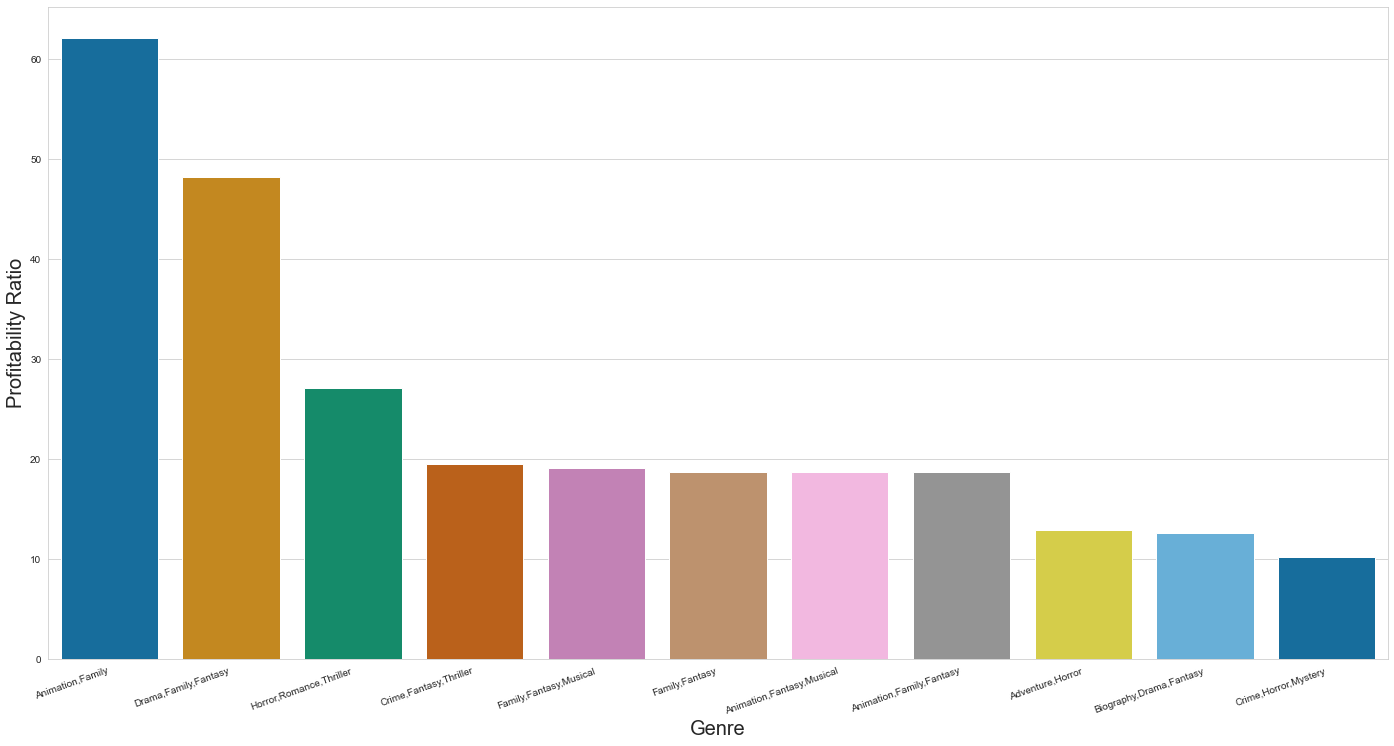

In [136]:
fig, ax = plt.subplots(figsize=(24,12))
sns.set_style("whitegrid")

sns.barplot(x=genre_graph.index, y=genre_graph['profitability_ratio'], palette='colorblind')

ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Profitability Ratio', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right");

In [137]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [138]:
df_budget['release_year'] = df_budget['release_year'].astype(str)

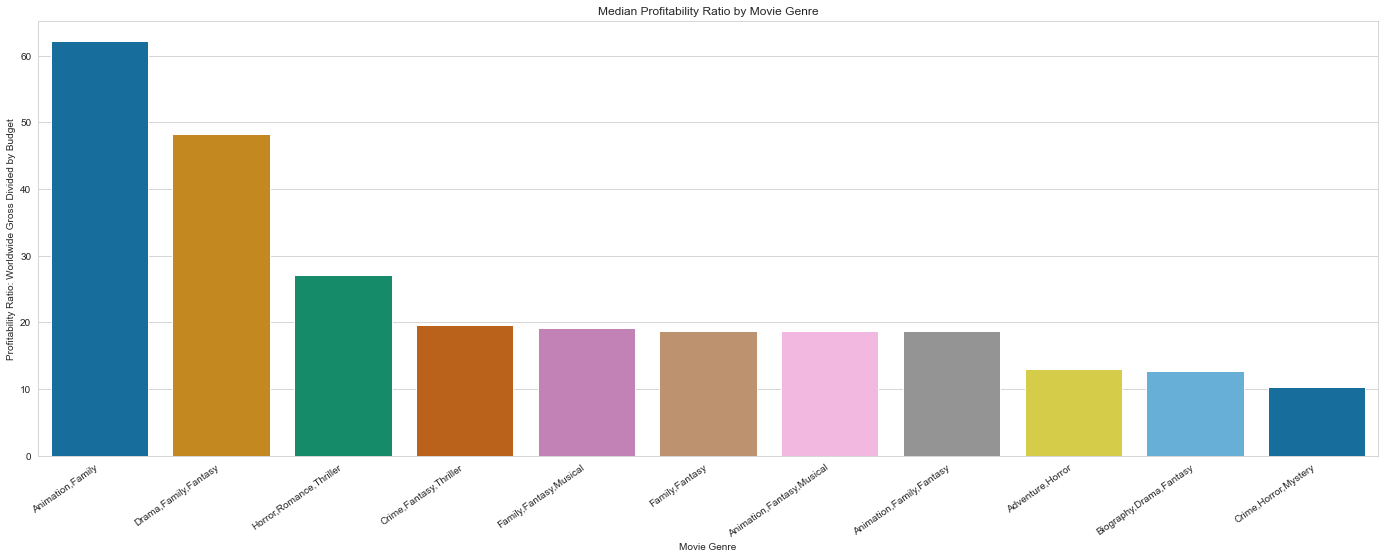

In [139]:
fig, ax = plt.subplots(figsize=(24,8))
sns.set_style("whitegrid")

sns.barplot(x=genre_graph.index, y=genre_graph['profitability_ratio'], palette="colorblind")

ax.set_title('Median Profitability Ratio by Movie Genre')
ax.set_xlabel('Movie Genre')
ax.set_ylabel('Profitability Ratio: Worldwide Gross Divided by Budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");

In [140]:
merged_basics_and_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,2001-07-06,Cure,10000,94596,94596,9.459600,High Profit,7,2001,tt5936960,Cure,Cure,2014,NaN,None
3811,70,1996-04-01,Bang,10000,527,527,0.052700,Loss,4,1996,tt6616538,Bang,Bang,2015,NaN,None
3812,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,Loss,1,2012,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


<ipython-input-141-9ac64dd0acfb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");


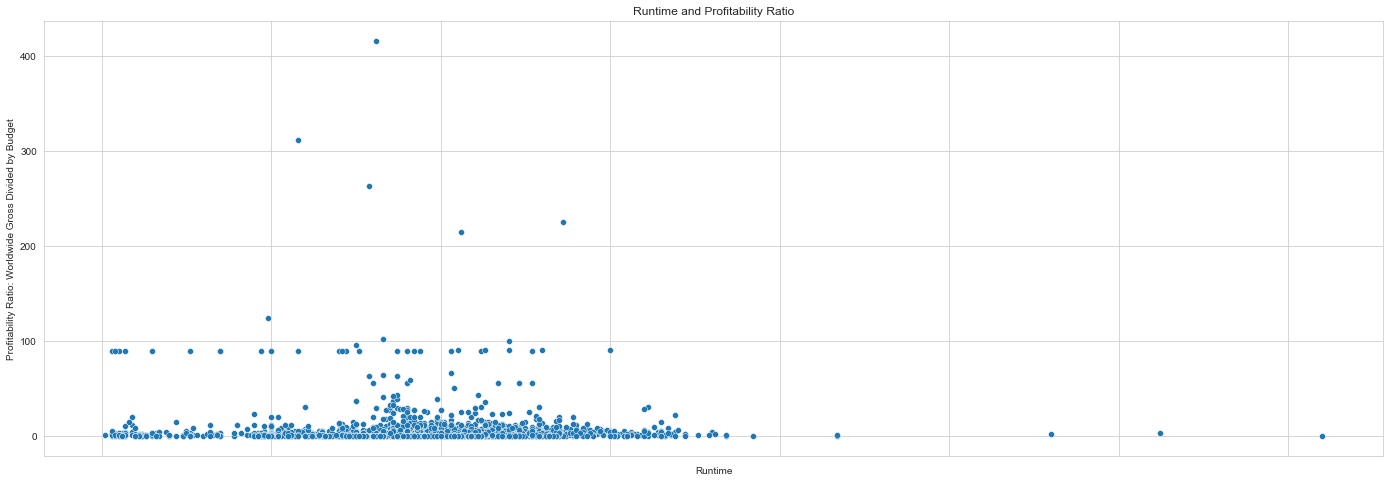

In [141]:
fig, ax = plt.subplots(figsize=(24,8))
sns.set_style("whitegrid")

sns.scatterplot(x=merged_basics_and_budgets['runtime_minutes'], y=merged_basics_and_budgets['profitability_ratio'], palette="colorblind")

ax.set_title('Runtime and Profitability Ratio')
ax.set_xlabel('Runtime')
ax.set_ylabel('Profitability Ratio: Worldwide Gross Divided by Budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");

In [142]:
nulls_dropped = merged_basics_and_budgets.dropna(subset=['runtime_minutes'])

In [143]:
nulls_dropped.isna().sum()

id                         0
release_date               0
movie                      0
production_budget          0
domestic_gross             0
worldwide_gross            0
profitability_ratio        0
Profitability Category     0
release_month              0
release_year               0
movie_id                   0
primary_title              0
original_title             0
start_year                 0
runtime_minutes            0
genres                    19
dtype: int64

In [144]:
stats.pearsonr(nulls_dropped['runtime_minutes'], nulls_dropped['profitability_ratio'])

(-0.04632260991202396, 0.007523733011614309)

<ipython-input-145-f3eb243d48e8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");


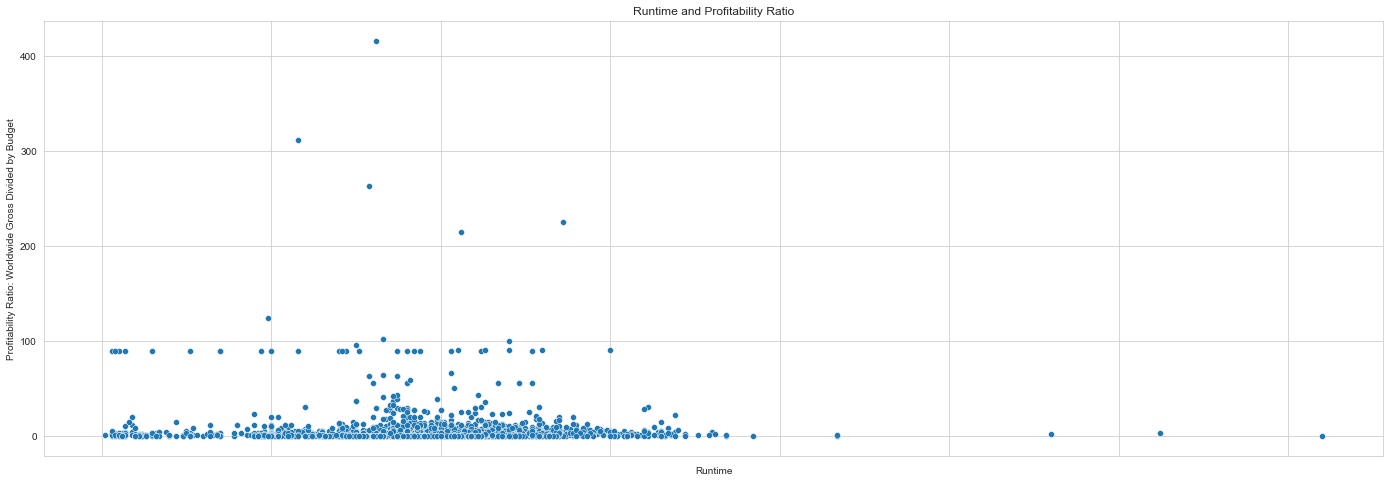

In [145]:
fig, ax = plt.subplots(figsize=(24,8))
sns.set_style("whitegrid")

sns.scatterplot(x=nulls_dropped['runtime_minutes'], y=nulls_dropped['profitability_ratio'], palette="colorblind")

ax.set_title('Runtime and Profitability Ratio')
ax.set_xlabel('Runtime')
ax.set_ylabel('Profitability Ratio: Worldwide Gross Divided by Budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");

In [146]:
nulls_dropped['gross-budget'] = nulls_dropped['worldwide_gross'] - nulls_dropped['production_budget']
nulls_dropped

<ipython-input-146-0032a9b3ff89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulls_dropped['gross-budget'] = nulls_dropped['worldwide_gross'] - nulls_dropped['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability_ratio,Profitability Category,release_month,release_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,gross-budget
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,6.532577,High Profit,12,2009,tt1775309,Avatar,Abatâ,2011,93.0,Horror,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,Low Profit,5,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,Loss,6,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,High Profit,5,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1072413963
4,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,High Profit,4,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1748134200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,67,2006-04-28,Clean,10000,138711,138711,13.871100,High Profit,4,2006,tt6619196,Clean,Clean,2017,70.0,"Comedy,Drama,Horror",128711
3809,68,2001-07-06,Cure,10000,94596,94596,9.459600,High Profit,7,2001,tt1872026,Cure,Cure,2011,93.0,Drama,84596
3812,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,Loss,1,2012,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",-4416
3813,78,2018-12-31,Red 11,7000,0,0,0.000000,Loss,12,2018,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",-7000


<ipython-input-147-db1bbce5bdbb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");


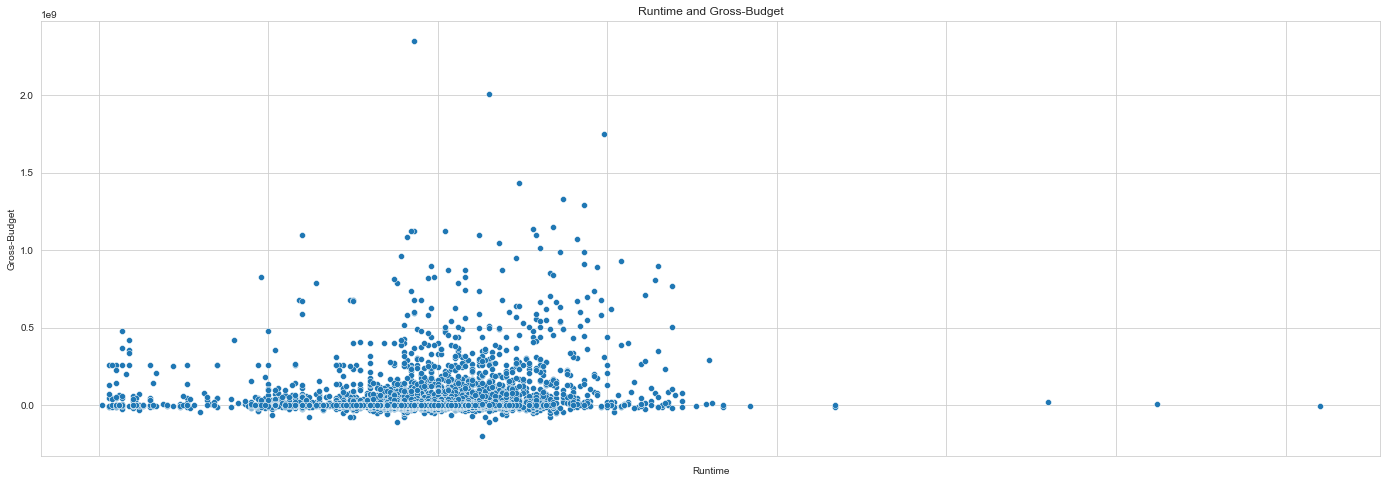

In [147]:
fig, ax = plt.subplots(figsize=(24,8))
sns.set_style("whitegrid")

sns.scatterplot(x=nulls_dropped['runtime_minutes'], y=nulls_dropped['gross-budget'], palette="colorblind")

ax.set_title('Runtime and Gross-Budget')
ax.set_xlabel('Runtime')
ax.set_ylabel('Gross-Budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");

In [148]:
stats.pearsonr(nulls_dropped['runtime_minutes'], nulls_dropped['gross-budget'])

(0.14292331794673366, 1.185630764237151e-16)

In [151]:
merged_basics_and_budgets.mean()

<ipython-input-151-7ac7b2c63bfb>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  merged_basics_and_budgets.mean()


id                     5.044718e+01
production_budget      3.260818e+07
domestic_gross         4.031735e+07
worldwide_gross        9.412387e+07
profitability_ratio    4.313756e+00
release_month          6.937353e+00
release_year           2.008774e+03
start_year             2.014293e+03
runtime_minutes        9.720463e+01
dtype: float64

In [152]:
horror_mystery_thriller.mean()

<ipython-input-152-61430057765f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  horror_mystery_thriller.mean()


start_year             2.014809e+03
runtime_minutes        9.147826e+01
id                     5.610638e+01
production_budget      1.303106e+07
domestic_gross         4.051988e+07
worldwide_gross        8.163502e+07
profitability_ratio    2.192605e+01
release_month          6.553191e+00
release_year           2.012553e+03
dtype: float64